In [1]:
using Plots
using Printf
using LaTeXStrings

using NumericalIntegration
using Trapz
using QuadGK

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

In [5]:
function left_riemann(x, y)
    return sum((x[2:end] .-x[1:end-1]) .* y[1:end-1]);
end

function right_riemann(x, y)
    return sum((x[2:end] .- x[1:end-1]) .* y[2:end]);
end

right_riemann (generic function with 1 method)

# Example
Compute
$$
\int_0^{\pi/2} \sin(x) dx = 1;
$$

In [27]:
n_vals = [5, 10, 20, 40, 80, 160, 320, 640];
left_riemann_vals = Float64[];
right_riemann_vals = Float64[];
trapz_vals = Float64[];
simps_vals = Float64[];

f(x) = sin(x);

for n in n_vals
    x = LinRange(0, π/2, n+1);
    y = f.(x);
    push!(left_riemann_vals, left_riemann(x, y));
    push!(right_riemann_vals, right_riemann(x, y));

    push!(trapz_vals, trapz(x, y));
    push!(simps_vals, integrate(x, y, SimpsonEven()));
end

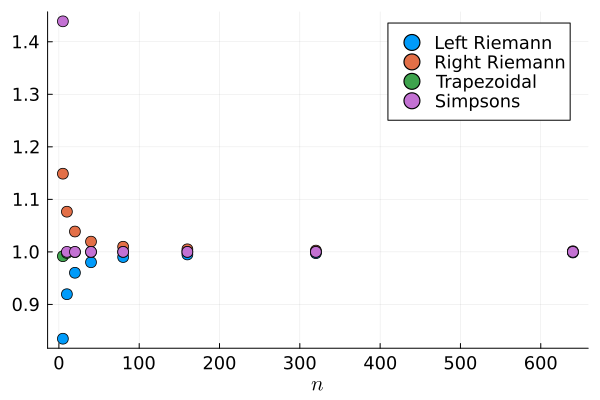

In [28]:
scatter(n_vals, left_riemann_vals, label="Left Riemann")
scatter!(n_vals, right_riemann_vals, label="Right Riemann")
scatter!(n_vals, trapz_vals, label="Trapezoidal")
scatter!(n_vals, simps_vals, label="Simpsons")
xlabel!(L"n")

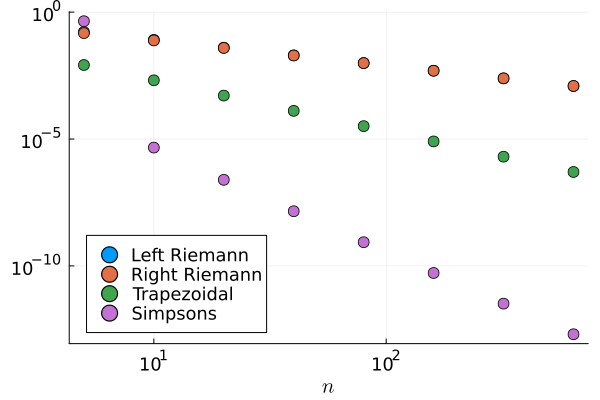

In [29]:
scatter(n_vals, abs.(left_riemann_vals .-1), xscale=:log10, yscale=:log10, label="Left Riemann", legend=:bottomleft)
scatter!(n_vals, abs.(right_riemann_vals .-1), label="Right Riemann")
scatter!(n_vals, abs.(trapz_vals .-1), label="Trapezoidal")
scatter!(n_vals, abs.(simps_vals .-1), label="Simpsons")
xlabel!(L"n")

In [30]:
quadgk(f, 0, π/2)

(0.9999999999999999, 1.1102230246251565e-16)